## Etapa 1: Importar bibliotecas, carregar e estudar os dados

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [37]:
df = pd.read_csv('../data/videogame_dataset.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12306,GRID 2,PC,2013.0,Racing,0.00,0.06,0.00,0.01,80.0,5.7,E
8306,Tokyo Xtreme Racer,DC,1999.0,Racing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
15745,NHL 2K3,GC,2002.0,Sports,0.01,0.00,0.00,0.00,89.0,7,E
16320,BlazBlue: Calamity Trigger,PC,2010.0,Fighting,0.00,0.01,0.00,0.00,NaN,8.7,T
8330,Gundam Assault Survive,PSP,2010.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
4407,LEGO Star Wars II: The Original Trilogy,XB,2006.0,Action,0.33,0.10,0.00,0.02,85.0,8.6,E10+
14245,Detective Conan: Phantom Rhapsody,3DS,2014.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1909,Disney's Lilo & Stitch,GBA,2002.0,Platform,0.77,0.29,0.00,0.02,NaN,NaN,NaN
7068,Super R-Type,SNES,1991.0,Shooter,0.00,0.00,0.23,0.00,NaN,NaN,NaN
1626,Vigilante 8,PS,1998.0,Racing,0.68,0.47,0.00,0.08,NaN,NaN,NaN


<!-- ## Etapa 2: Preparar os dados para análise -->

## Etapa 2: Preparar os dados para análise

Após análise inicial do dataset, as classificações abaixo foram criadas para garantir consistência, padronização e preparo adequado dos dados para as etapas subsequentes da análise.

#### Certezas:
- Padronizar nomes das colunas para letras minúsculas usando .lower() para facilitar a manipulação e manter consistência.
- Renomear other_sales para row_sales para refletir corretamente seu significado.
- Converter year_of_release de float para int, removendo previamente as poucas linhas com NaN para preservar integridade.
- Tratar a coluna user_score:
    - substituir 'tbd' por NaN, já que ambos representam ausência de avaliação,
    - converter para float,
    - utilizar -1 como placeholder temporário para valores ausentes, visando manter o tipo numérico para análises futuras.
- Criar a coluna global_sales somando as vendas de todas as regiões.

#### Talvez:
- Coluna rating (ESRB): manter os valores originais, mas possivelmente utilizar um dicionário descritivo ao gerar gráficos.
- Manter valores de vendas em milhões de dólares para evitar números muito extensos; revisar apenas se a forma de visualização exigir ajustes.

#### Reavaliar:
- Escalas de score (user e critic): decidir entre padronizar ambas para 0–10, 0–100 ou outra escala comum, dependendo do uso futuro nas análises.
- Tratamento de valores ausentes nas colunas de score e rating: avaliar se devem ser excluídos, mantidos ou preenchidos (média/mediana), conforme a relevância futura.

In [38]:
game_df = df.copy()
# colunas com nome minúsculo
game_df.columns = game_df.columns.str.lower()
# renomeando coluna other_sales
game_df = game_df.rename(columns={"other_sales": "row_sales"})
# lidando com os nulos e convertendo o dtype da coluna year_of_release
game_df = game_df.dropna(subset=["year_of_release"]).reset_index(drop=True)
game_df["year_of_release"] = game_df["year_of_release"].astype("int")
# substituindo os tbds por NaNs e convertendo o dtype da coluna user_score
game_df["user_score"] = game_df["user_score"].where(game_df["user_score"] != 'tbd', np.nan)
game_df["user_score"] = game_df["user_score"].astype("float")
# criando coluna com as vendas totais por jogo 
game_df['global_sales'] = game_df[["na_sales", "eu_sales", "row_sales", "row_sales"]].sum(axis=1)
# reorganizando as colunas para ter as colunas de sales lado a lado
cols = list(game_df.columns) 
row_index = cols.index('row_sales') 
col_to_move = cols.pop(cols.index('global_sales'))
cols.insert(row_index + 1, col_to_move)
game_df = game_df[cols]

game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,87.22,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,34.20,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.02,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.44,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,22.16,NaN,NaN,NaN


In [39]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   row_sales        16446 non-null  float64
 8   global_sales     16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [40]:
# # COLUNA DE RATING - caso precise alterá-la/complementá-la para o reporte final
# rating_labels = {
#     "EC": "Early Childhood",
#     "E": "Everyone",
#     "E10+": "Everyone 10+",
#     "T": "Teen",
#     "M": "Mature 17+",
#     "AO": "Adults Only 18+",
#     "RP": "Rating Pending",
#     "K-A": "Kids to Adults"    
# }

# df['rating_clean'] = df['rating'].fillna("Unknown")
# df['rating_label'] = df['rating'].map(rating_labels)

As transformações aplicadas priorizaram integridade e coerência dos dados, garantindo que o dataset esteja pronto para análises posteriores. Ajustes adicionais foram deixados em aberto de forma intencional, dependendo da relevância dessas variáveis nos próximos estágios.

## Etapa 3: Analisar os dados

In [41]:
game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,87.22,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,34.20,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.02,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.44,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,22.16,NaN,NaN,NaN


#### A) Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?

In [42]:
games_per_year = (
    game_df
    .groupby('year_of_release')
    .size()
    .reset_index(name='games_count')
    .sort_values('games_count')
)

display(games_per_year.head(10))
games_per_year.describe().round(2)

,year_of_release,games_count
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


,year_of_release,games_count
count,37.00,37.00
mean,1998.00,444.49
std,10.82,451.56
min,1980.00,9.00
25%,1989.00,36.00
50%,1998.00,338.00
75%,2007.00,762.00
max,2016.00,1427.00


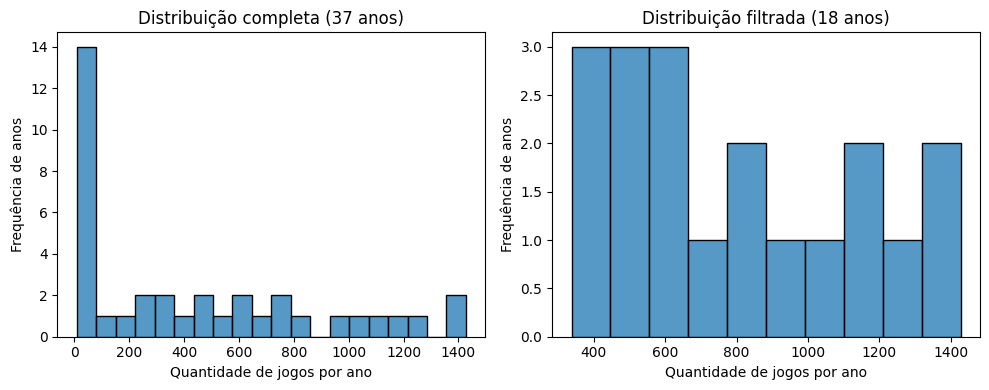

In [43]:
# criando histogramas com todos os dados do dataset e com filtro a partir da mediana
# criando o filtro
threshold = games_per_year["games_count"].median()
top_years = games_per_year[games_per_year["games_count"] >= threshold]

# criando os histogramas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# todos os dados
sns.histplot(
    data=games_per_year,
    x="games_count",
    bins=20,
    ax=axes[0]
)
axes[0].set_title("Distribuição completa (37 anos)")
axes[0].set_xlabel("Quantidade de jogos por ano")
axes[0].set_ylabel("Frequência de anos")

# dados filtrados
sns.histplot(
    data=top_years,
    x="games_count",
    bins=10,
    ax=axes[1]
)
axes[1].set_title("Distribuição filtrada (18 anos)")
axes[1].set_xlabel("Quantidade de jogos por ano")
axes[1].set_ylabel("Frequência de anos")

plt.tight_layout()
plt.show()


Os dados do dataset mostram um grande aumento no lançamento de jogos a partir dos anos 2000, com pico entre 2008-2010. Os anos anteriores são menos representativos, com 25% deles registrando 36 jogos ou menos. A diferença entre mediana (338) e média (444) indica uma distribuição assimétrica, puxada pelos anos com maior registros. Para evitar viés negativos na análise, os próximos passos devem concentrar-se no período de dados do dataset em que os lançamentos de jogos é maior e mais estável (anos 2000+).

A diferença visual entre os histogramas se dá pela quantidade do conjunto de dados. O histograma completo inclui todos os anos disponíveis (37), enquanto o histograma filtrado contém apenas os anos com volume acima da mediana (~18), por isso o gráfico filtrado naturalmente apresenta frequências menores. Essa diferença é esperada e reforça o motivo da filtragem: os anos de menor volume distorcem a distribuição e não são representativos para análises comparativas.

#### B) Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados para cada ano. Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [44]:
# analisando as vendas por plataforma
sales_by_platform = (
    game_df
    .groupby("platform")["global_sales"]
    .sum()
    .rename("total_sales")
    .sort_values(ascending=False)
)
# print(sales_by_platform)

# calculando a fatia de vendas de cada plataforma 
total_sales_sum = sales_by_platform.sum()
sales_share = sales_by_platform.cumsum() / total_sales_sum
platform_sales_share = pd.DataFrame({
    "total_sales": sales_by_platform,
    "cumulative_share": sales_share
})
# print(platform_sales_share)

# selecionando apenas as plataformas que correspondem a até 80% do total
top_platforms = platform_sales_share[
    platform_sales_share["cumulative_share"] <= 0.8
].index.tolist()
# print(top_platforms)

# filtrando o dataframe original com as top_platforms
top_platforms_df = game_df[game_df["platform"].isin(top_platforms)]

# agrupando os dados por platform e year_of_release e somando as global_sales
platform_year_sales = (
    top_platforms_df
    .groupby(["platform", "year_of_release"])["global_sales"]
    .sum()
    .reset_index(name="yearly_sales")
    .sort_values(["platform", "year_of_release"])
)
display(platform_year_sales)


,platform,year_of_release,yearly_sales
0,DS,1985,0.00
1,DS,2004,14.98
2,DS,2005,111.08
3,DS,2006,89.42
4,DS,2007,131.22
...,...,...,...
100,X360,2012,106.97
101,X360,2013,95.91
102,X360,2014,37.79
103,X360,2015,13.06


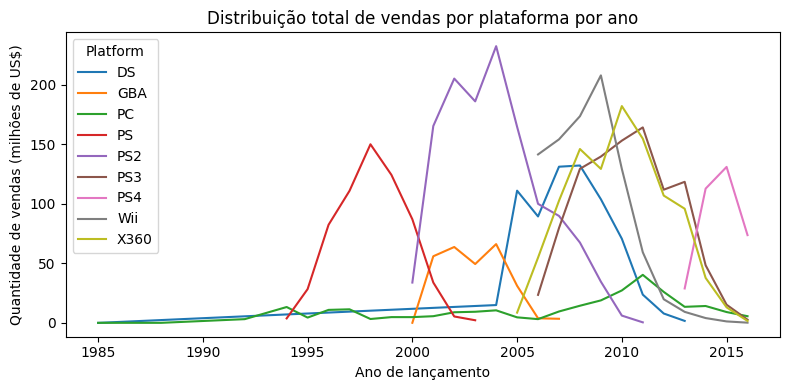

In [45]:
# visualizando a venda total de cada uma das top_platforms através dos anos
plt.figure(figsize=(8, 4))

sns.lineplot(
    data=platform_year_sales,
    x="year_of_release",
    y="yearly_sales",
    hue="platform",
    legend=True
)

plt.title("Distribuição total de vendas por plataforma por ano")
plt.xlabel("Ano de lançamento")
plt.ylabel("Quantidade de vendas (milhões de US$)")
plt.legend(title="Platform")

plt.tight_layout()
plt.show()

In [46]:
# para cada plataforma pegar first_year, last_year, lifespan (last - first year) e peak_year (max yearly_sales)
# top_platforms - ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC']
# platform_year_sales.head()

# pegando o primeiro, ultimo e ciclo de vida de cada plataforma
platform_lifecycle = (
    platform_year_sales
    .groupby('platform')
    .agg(
    first_year=("year_of_release", "min"),
    last_year=("year_of_release", "max")
)
)
platform_lifecycle["lifespan"] = (platform_lifecycle["last_year"] - platform_lifecycle["first_year"] + 1)
# display(platform_lifecycle)

# pegando o ano com maior venda de cada plataforma 
index_peak = (
    platform_year_sales
    .groupby('platform')["yearly_sales"]
    .idxmax()
    )

platform_peak_year = (
    platform_year_sales
    .loc[index_peak, :]
    .rename(columns={
        "year_of_release": "peak_year",
        "yearly_sales": "peak_sales"
    })
    .set_index('platform')
)
# display(platform_peak_year)

# juntando todos os dados em um único df
platform_summary = (
    platform_lifecycle
    .join(platform_peak_year, how='left')
    .sort_values('first_year')
)

display(platform_summary)

,first_year,last_year,lifespan,peak_year,peak_sales
platform,,,,,
DS,1985,2013,29,2008,132.24
PC,1985,2016,32,2011,40.36
PS,1994,2003,10,1998,150.06
GBA,2000,2007,8,2004,66.20
PS2,2000,2011,12,2004,232.49
X360,2005,2016,12,2010,182.15
PS3,2006,2016,11,2011,164.24
Wii,2006,2016,11,2009,207.94
PS4,2013,2016,4,2015,131.05


A tabela sumário nos mostra que as plataformas PS, GBA e DS foram bastante populares, porém desapareceram antes do período analisado (2016). As três plataformas tiveram picos relevantes de vendas que coincidentemente aconteceram 4 anós após seus lançamentos, mas foram aos poucos perdendo mercado para gerações de plataformas mais novas (como PS2, PSP). <br>
Adicionalmente, os ciclos de vida (coluna lifespan) de cada uma dessas plataformas de sucesso, desde seus lançamentos, pico de vendas e subsequentes desaparecimento, costumam durar entre 8 a 12 anos.


Observação: o dataset apresenta um erro na coluna year_of_release para a plataforma DS, registrando o lançamento do console na tabela sumário acima como 1985, quando, na realidade, esse console foi lançado em 2004. Para a análise, considerei apenas os anos em que o DS efetivamente possui vendas registradas (2004 para cima), refletindo seu ciclo de vida verdadeiro.

#### C) Determine para qual período você deve pegar dados. Para fazer isso, olhe para suas respostas das perguntas anteriores. Os dados devem permitir que você construa um modelo para 2017. Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.


In [47]:
# games_per_year.sort_values('games_count', ascending=False)

print("=*=*=*= TOTAL YEARS =*=*=*=")
display(games_per_year.describe(percentiles={0.5, 0.7, 0.8}))

print("=*=*=*= TOP YEARS =*=*=*=")
display(top_years.describe())

=*=*=*= TOTAL YEARS =*=*=*=


,year_of_release,games_count
count,37.000000,37.000000
mean,1998.000000,444.486486
std,10.824355,451.557159
min,1980.000000,9.000000
50%,1998.000000,338.000000
70%,2005.200000,615.400000
80%,2008.800000,818.200000
max,2016.000000,1427.000000


=*=*=*= TOP YEARS =*=*=*=


,year_of_release,games_count
count,19.000000,19.000000
mean,2007.000000,799.315789
std,5.627314,356.140430
min,1998.000000,338.000000
25%,2002.500000,523.000000
50%,2007.000000,762.000000
75%,2011.500000,1071.000000
max,2016.000000,1427.000000


In [48]:
# filtrando o dataframe para incluir apenas os dados referentes à lançamentos após 2005
df_2005_2016 = game_df[game_df["year_of_release"] >= 2005]
df_2005_2016.describe() 
# display(df_2005_2016.sample(10))


,year_of_release,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score
count,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,5645.000000,5538.000000
mean,2009.631831,0.233217,0.143463,0.054611,0.052638,0.481954,68.487865,6.914410
std,3.082748,0.750410,0.552300,0.252594,0.181365,1.584443,13.881781,1.503832
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.020000,60.000000,6.200000
50%,2009.000000,0.070000,0.020000,0.000000,0.010000,0.120000,70.000000,7.300000
75%,2012.000000,0.210000,0.100000,0.030000,0.040000,0.420000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,87.220000,98.000000,9.700000


A análise exploratória mostrou que os anos anteriores a 2005 apresentam um volume muito baixo de lançamentos e refletem um mercado ainda imaturo, com plataformas já descontinuadas ou irrelevantes para uma previsão futura. A distribuição anual de jogos, os histogramas e os percentis analisados indicam que a indústria se estabiliza a partir de 2005, quando o número de lançamentos cresce de forma consistente e as plataformas modernas entram no mercado (X360, Wii, PS3, PS4).

Assim, para construir um modelo que ajude a prever o desempenho em 2017, é mais adequado utilizar apenas os dados entre 2005 e 2016. Esse intervalo concentra a maior parte das vendas, contém plataformas ainda ativas e representa de forma fiel o comportamento recente do mercado global de videogames.

#### D) Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [49]:
platform_summary.sort_values('last_year', ascending=False)

# criando listas das plataformas a selecionar para previsão
prediction_platforms = ["PC", "PS4", "3DS"]
pred_optional_platforms = ["PC", "PS4", "3DS", "PS3", "X360"]

Ao analisar o ciclo de vida das plataformas (ano de início, ano final, pico de vendas e duração), observou-se que várias plataformas atingiram seu auge e desapareceram antes do final do período analisado, como PS, GBA, DS, PS2, Wii e PSP. Escolhi PS4, PC e 3DS como as plataformas principais para análise prospectiva porque todas permanecem ativas até 2016, apresentam vendas consistentes e não chegaram ao final de seu ciclo de vida. Essas plataformas ainda possuem potencial de crescimento e relevância no mercado em 2017.

Dessa forma, as plataformas mais recomendadas para previsões são: </br>
	- PS4 – plataforma nova, em crescimento, e ainda longe do final de seu ciclo de vida. </br>
	- PC – plataforma contínua, sem ciclo definido, com mercado estável e permanente. </br>
	- 3DS – ainda ativa e com vendas relevantes até 2016. </br>

Plataformas opcionais, por estarem em declínio mas ainda presentes em 2016: </br>
	- PS3 </br>
	- X360

#### E) Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

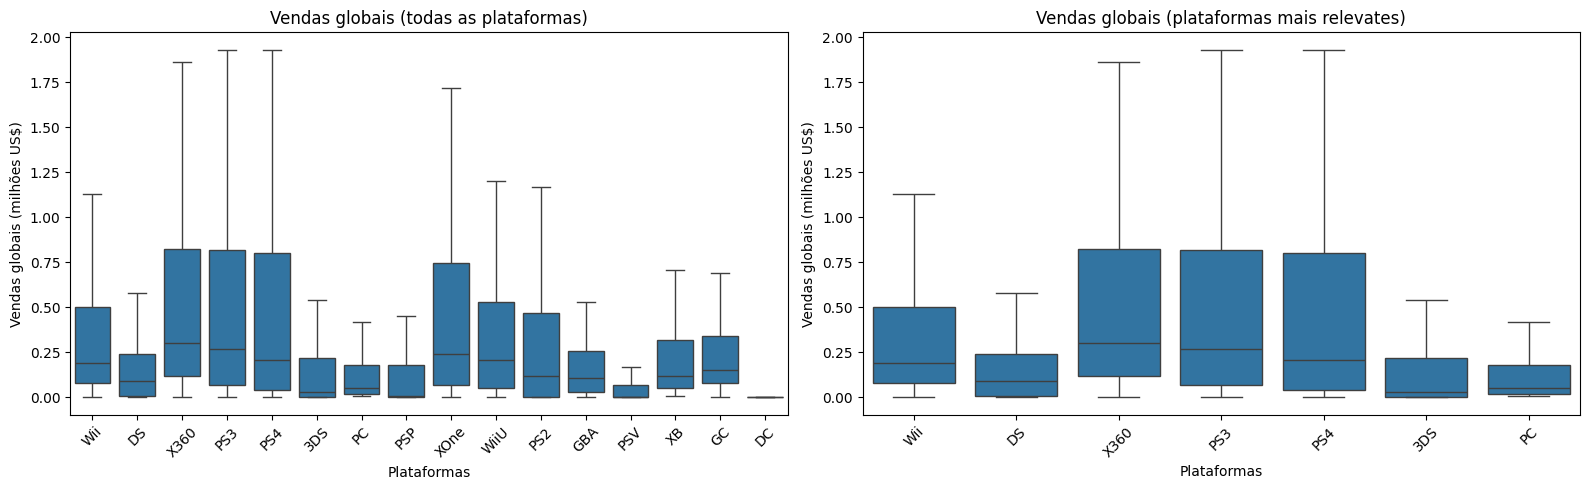

In [50]:
# boxplots totas plataformas vs plataformas filtradas
description_platforms = ['PC', 'PS4', '3DS', 'PS3', 'X360', 'Wii', 'DS']

plt.figure(figsize=(16, 5))

# boxplot 1: todas as plataformas
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_2005_2016,
    x='platform',
    y='global_sales',
    showfliers=False # para não exibir os outliers
)

plt.title('Vendas globais (todas as plataformas)')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.ylabel('Vendas globais (milhões US$)')

# boxplot 2: plataformas filtradas
mask_platforms = df_2005_2016[df_2005_2016["platform"].isin(description_platforms)]
plt.subplot(1, 2, 2)
sns.boxplot(
    data=mask_platforms,
    x='platform',
    y='global_sales',
    showfliers=False
)

plt.title('Vendas globais (plataformas mais relevates)')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.ylabel('Vendas globais (milhões US$)')

plt.tight_layout()
plt.show()

In [51]:
# visualizando as vendas médias (e mediana) por plataforma
print('=*=*=*=*=*= TODAS PLATAFORMAS =*=*=*=*=*=')
display(df_2005_2016.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('mean', ascending=False))
# display(df_2005_2016.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('max', ascending=False))
print('=*=*=*=*=*= PLATAFORMAS RELEVANTES =*=*=*=*=*=')
display(mask_platforms.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('mean', ascending=False))


=*=*=*=*=*= TODAS PLATAFORMAS =*=*=*=*=*=


,count,mean,std,min,50%,max
platform,,,,,,
PS4,392.0,0.88,1.83,0.00,0.21,16.65
X360,1232.0,0.84,1.76,0.00,0.30,23.27
PS3,1306.0,0.76,1.58,0.00,0.27,24.03
Wii,1286.0,0.70,3.23,0.00,0.19,87.22
XOne,247.0,0.70,1.13,0.00,0.24,8.06
WiiU,147.0,0.51,0.93,0.00,0.21,6.32
PS2,1065.0,0.44,0.85,0.00,0.12,6.46
3DS,512.0,0.33,1.12,0.00,0.03,11.03
DS,2097.0,0.32,1.24,0.00,0.09,26.18


=*=*=*=*=*= PLATAFORMAS RELEVANTES =*=*=*=*=*=


,count,mean,std,min,50%,max
platform,,,,,,
PS4,392.0,0.88,1.83,0.00,0.21,16.65
X360,1232.0,0.84,1.76,0.00,0.30,23.27
PS3,1306.0,0.76,1.58,0.00,0.27,24.03
Wii,1286.0,0.70,3.23,0.00,0.19,87.22
3DS,512.0,0.33,1.12,0.00,0.03,11.03
DS,2097.0,0.32,1.24,0.00,0.09,26.18
PC,813.0,0.23,0.59,0.01,0.05,8.61


Os boxplots revelam diferenças claras e estruturais nas vendas globais entre as plataformas. Mesmo dentro do período filtrado (2005–2016), observamos que as distribuições são altamente assimétricas e apresentam muitos outliers — característica esperada do mercado de videogames, no qual poucos títulos alcançam vendas muito altas enquanto a maioria permanece em faixas baixas. </br>
As plataformas mais relevantes (PS4, PS3, X360, 3DS e PC) apresentam perfis distintos de vendas, com consoles de mesa concentrando títulos de maior impacto. As médias confirmam essas diferenças: PS4, PS3 e X360 exibem vendas superiores, enquanto PC e 3DS concentram mais jogos de vendas baixas, puxando suas médias para baixo.

#### F) Veja como as avaliações de usuários e profissionais afetam as vendas de uma das plataformas populares (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre avaliações e vendas.


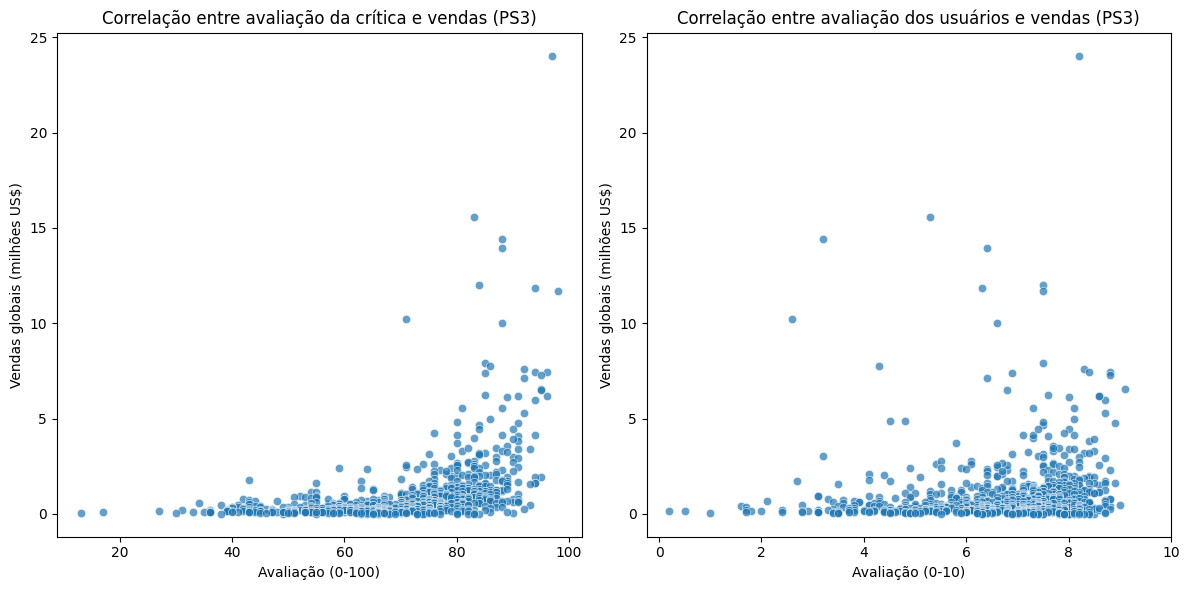

In [52]:
# platform_summary.sort_values('peak_sales', ascending=False)

# escolhendo PS3 para análise pois tem bastante vendas e permanece relevante em 2016
filtro_ps3 = df_2005_2016[df_2005_2016["platform"] == 'PS3']

plt.figure(figsize=(12, 6))

# SCATTER 1: AVALIAÇÃO CRÍTICOS
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filtro_ps3,
    x='critic_score',
    y='global_sales',
    alpha=0.7
)

plt.title('Correlação entre avaliação da crítica e vendas (PS3)')
plt.xlabel('Avaliação (0-100)')
plt.ylabel('Vendas globais (milhões US$)')

# SCATTER 2: AVALIAÇÃO USUÁRIOS
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=filtro_ps3,
    x='user_score',
    y='global_sales',
    alpha=0.7
)

plt.title('Correlação entre avaliação dos usuários e vendas (PS3)')
plt.xlabel('Avaliação (0-10)')
plt.xticks(range(0, 11, 2))
plt.ylabel('Vendas globais (milhões US$)')

plt.tight_layout()
plt.show()

In [53]:
# calculando a correlação entre scores e sales
# filtro_ps3[["critic_score", "global_sales"]].corr()
# filtro_ps3[["user_score", "global_sales"]].corr()
filtro_ps3[["critic_score","user_score", "global_sales"]].corr().round(2)

,critic_score,user_score,global_sales
critic_score,1.00,0.63,0.43
user_score,0.63,1.00,0.12
global_sales,0.43,0.12,1.00


Os gráficos mostram que há uma correlação positiva e moderada (0.43) entre as avaliações da crítica e as vendas globais no PS3. Jogos com notas acima de 80 tendem a apresentar vendas mais altas, embora existam exceções. Já a correlação entre avaliações dos usuários e vendas é fraca (0.13), indicando que a nota dos usuários, por si só, não é um bom preditor de desempenho comercial.

Adicionalmente, as avaliações dos críticos e dos usuários têm correlação moderada entre si (0.63), sugerindo uma concordância razoável entre a percepção dos críticos e a do público — mas não total. No geral, a crítica parece ter mais relação com desempenho de vendas do que as avaliações dos jogadores.

#### G) Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.


In [54]:
# agrupando por jogo e verificando em quantas plataformas cada jogo foi lançado
game_grouping = (
    df_2005_2016
    .groupby('name')['platform']
    .count()
    .reset_index()
)

# filtrando apenas os jogos lançados em 2+ plataformas
multi_platform_games = game_grouping[game_grouping['platform'] >= 2]

# usando o filtro no df completo para analisar a diferença das vendas por jogo por plataforma
multi_platform_sales = df_2005_2016[df_2005_2016['name'].isin(multi_platform_games['name'])]
multi_platform_sales[['name', 'platform', 'global_sales']].sort_values('name')

,name,platform,global_sales
3312,Frozen: Olaf's Quest,3DS,0.64
3811,Frozen: Olaf's Quest,DS,0.55
14429,007: Quantum of Solace,PC,0.02
3079,007: Quantum of Solace,Wii,0.71
1273,007: Quantum of Solace,X360,1.61
...,...,...,...
4600,pro evolution soccer 2011,PS2,0.47
643,pro evolution soccer 2011,PS3,2.28
2547,pro evolution soccer 2011,PSP,0.67
8149,uDraw Studio: Instant Artist,Wii,0.19


In [55]:
# criando uma pivot table para comparar as vendas de cada jogo por plataforma
pivot_platform_sales = multi_platform_sales.pivot_table(
    index='name',
    columns='platform',
    values='global_sales',
    aggfunc='sum',
)

# apenas substituindo os NaNs por '-' para facilitar a visualização, sem alterar o df original para manter os dados como numéricos
display(pivot_platform_sales.fillna('-', inplace=False).sample(5))
pivot_platform_sales.describe().round(2)

platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,
Margot's Word Brain,-,0.09,-,-,-,-,-,-,-,-,0.14,-,-,-,-
MindJack,-,-,-,-,-,-,0.2,-,-,-,-,-,0.11,-,-
NHL 2K7,-,-,-,-,-,-,0.13,-,-,-,-,-,0.09,0.01,-
LEGO Marvel's Avengers,0.18,-,-,-,-,-,0.3,0.85,-,0.15,-,0.26,0.35,-,0.37
Dynasty Warriors 8,-,-,-,-,-,-,0.32,-,-,-,-,-,0.16,-,-


platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
count,133.00,506.00,50.00,115.00,438.00,532.00,1023.00,321.00,365.00,202.00,661.00,99.00,980.00,187.00,224.00
mean,0.27,0.37,0.24,0.24,0.25,0.65,0.81,0.97,0.37,0.10,0.54,0.30,0.86,0.26,0.66
std,0.56,0.57,0.28,0.29,0.62,1.00,1.64,1.94,0.76,0.20,0.98,0.50,1.64,0.34,1.10
min,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01
25%,0.03,0.09,0.04,0.08,0.02,0.12,0.12,0.06,0.02,0.00,0.11,0.05,0.14,0.06,0.06
50%,0.13,0.16,0.16,0.15,0.07,0.34,0.34,0.27,0.14,0.01,0.25,0.14,0.34,0.13,0.24
75%,0.30,0.42,0.30,0.28,0.22,0.64,0.88,0.92,0.42,0.12,0.59,0.40,0.90,0.32,0.70
max,5.60,5.22,1.16,1.59,8.61,6.46,24.03,16.65,9.17,1.30,11.18,4.44,17.62,2.05,8.06


A análise da pivot table mostra que jogos lançados em várias plataformas vendem significativamente mais em consoles domésticos (como PS4, PS3 e X360) do que em PC e portáteis (DS, DS3, PSP...). As três principais plataformas domésticas apresentam as maiores médias, medianas e terceiros quartis de vendas, além dos maiores valores máximos, indicando que contém tanto a base quanto os grandes sucessos. O PC e as plataformas portáteis possuem desempenho consistentemente inferior, com medianas e Q3 muito menores. </br>
Em suma, as vendas de jogos lançados em múltiplas plataformas são quase sempre dominadas pelos consoles domésticos.

#### H) Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [56]:
# agrupar por genero e somar global_sales para ver qual é mais lucrativo
genre_grouping = (
    df_2005_2016
    .groupby('genre')['global_sales']
    .sum()
    .reset_index()
)

genre_grouping.sort_values('global_sales', ascending=False)

,genre,global_sales
0,Action,1234.68
10,Sports,903.35
8,Shooter,826.75
3,Misc,607.77
7,Role-Playing,414.99
6,Racing,382.29
4,Platform,296.80
9,Simulation,261.61
2,Fighting,201.06
1,Adventure,132.58


Os três gêneros mais lucrativos são Action, Sports e Shooter, impulsionados por franquias de enorme alcance comercial (como Call of Duty, FIFA e GTA) e por modelos de lançamento frequentes, marketing agressivo e ampla disponibilidade multiplataforma. Os gêneros Misc (jogos híbridos e casuais, muito fortes em consoles como Wii e DS) e Platform (como Mario e Donkey Kong) também apresentam vendas elevadas, mas sua rentabilidade depende fortemente de poucos títulos de grande apelo, o que reduz a quantidade de lançamentos ao longo dos anos. Já os gêneros Adventure, Puzzle e Strategy aparecem com vendas mais baixas, refletindo tanto um volume menor de lançamentos quanto um público mais restrito e especializado, características que limitam seu potencial comercial.

### Conclusões gerais:

A análise dos dados entre 2005 e 2016 revela um mercado global já consolidado, no qual plataformas domésticas — especialmente PS4, PS3 e X360 — concentram a maior parte do volume de vendas e se destacam pelo desempenho superior dos jogos multiplataforma. A predominância dos gêneros Action, Sports e Shooter reflete um padrão de consumo orientado por franquias de grande apelo, forte presença multiplataforma e campanhas de marketing robustas, enquanto gêneros como Puzzle, Strategy e Adventure ocupam nichos menores, com impacto comercial limitado. As avaliações da crítica mostram correlação moderada com o desempenho em vendas, enquanto as avaliações dos usuários possuem relação mais fraca, indicando que fatores estruturais — plataforma, apelo de franquia e distribuição — exercem influência maior no sucesso comercial de um título.

A comparação entre versões multiplataforma reforça essa assimetria: consoles de mesa lideram consistentemente as vendas de um mesmo jogo, enquanto PC e dispositivos portáteis apresentam resultados inferiores tanto em média quanto em mediana. 

Definido esse panorama global, a próxima etapa é analisar como as diferenças regionais de mercado moldam o comportamento de vendas na América do Norte, Europa, Japão e demais regiões.

## Etapa 4: Criar um perfil para cada região e analisá-los

Para cada uma das três regiões principais (América do Norte, Europa e Japão), foram analisadas as vendas por plataforma, gênero e ano de lançamento para construir um perfil de consumo regional. Em seguida, as cinco principais plataformas e os cinco principais gêneros de cada região são comparados em termos de participação relativa nas vendas, permitindo entender como as “quotas de mercado” variam de região para região. Por fim, é avaliado se as classificações do ESRB (E, T, M, etc.) estão associadas a diferenças relevantes nas vendas em cada região.

### Comparação entre regiões: plataformas

In [72]:
# vendas totais por região 
total_by_region = df_2005_2016[["na_sales", "eu_sales", "jp_sales"]].sum()

# vendas por plataforma em cada região
platform_region_sales = (
    df_2005_2016
    .groupby("platform")[["na_sales", "eu_sales", "jp_sales"]]
    .sum()
)

# participação (%) de cada plataforma por região
platform_region_share = (
    platform_region_sales
    .div(total_by_region, axis=1) * 100
)

# top 5 plataformas por região (índices)
top5_na_plat = platform_region_sales["na_sales"].sort_values(ascending=False).head(5).index
top5_eu_plat = platform_region_sales["eu_sales"].sort_values(ascending=False).head(5).index
top5_jp_plat = platform_region_sales["jp_sales"].sort_values(ascending=False).head(5).index

# união das plataformas relevantes (todas que aparecem em algum top 5)
top_platforms_union = sorted(set(top5_na_plat) | set(top5_eu_plat) | set(top5_jp_plat))

# tabela final de participação por plataforma (apenas top relevantes)
platform_share_top = platform_region_share.loc[top_platforms_union].round(1)

display(platform_share_top)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,3.1,3.8,16.3
DS,14.2,11.4,27.8
PS2,7.6,5.4,8.3
PS3,14.8,20.2,12.9
PS4,4.1,8.7,2.6
PSP,4.0,4.0,12.0
Wii,18.5,16.0,11.1
X360,22.7,16.6,2.0


As plataformas de maior participação variam fortemente por região: X360, Wii e PS3 dominam América do Norte e Europa, enquanto DS, 3DS e PSP concentram as vendas no Japão. No Ocidente, consoles domésticos lideram com grande folga; no Japão, o mercado é amplamente orientado para portáteis.

### Comparação entre regiões: gêneros

In [73]:
# vendas por gênero em cada região
genre_region_sales = (
    df_2005_2016
    .groupby("genre")[["na_sales", "eu_sales", "jp_sales"]]
    .sum()
)

# participação (%) de cada gênero por região
genre_region_share = (
    genre_region_sales
    .div(total_by_region, axis=1) * 100
)

# top 5 gêneros por região
top5_na_gen = genre_region_sales["na_sales"].sort_values(ascending=False).head(5).index
top5_eu_gen = genre_region_sales["eu_sales"].sort_values(ascending=False).head(5).index
top5_jp_gen = genre_region_sales["jp_sales"].sort_values(ascending=False).head(5).index

# união dos gêneros relevantes
top_genres_union = sorted(set(top5_na_gen) | set(top5_eu_gen) | set(top5_jp_gen))

# tabela final de participação por gênero (apenas top relevantes)
genre_share_top = genre_region_share.loc[top_genres_union].round(1)

display(genre_share_top)

,na_sales,eu_sales,jp_sales
genre,,,
Action,22.1,23.0,17.6
Misc,11.9,10.3,11.8
Platform,5.7,5.4,5.9
Racing,6.2,8.0,2.9
Role-Playing,8.1,7.1,29.2
Shooter,15.3,15.3,3.4
Sports,16.5,16.4,8.5


Action, Sports e Shooter são os gêneros mais fortes em América do Norte e Europa, refletindo preferências por jogos competitivos e de grande apelo global. Já no Japão, Role-Playing é o gênero dominante, com quase o dobro da participação observada no Ocidente, mostrando uma preferência cultural consistente por jogos narrativos e de progressão longa.

### Efeito das classificações ESRB por região

In [76]:
# desempenho geral dos ratings no mercado
# removendo linhas com NaNs
df_rated = df_2005_2016.dropna(subset=["rating"])

# vendas totais por rating em cada região
rating_region_sales = (
    df_rated
    .groupby("rating")[["na_sales", "eu_sales", "jp_sales"]]
    .sum()
)

# participação (%) por rating em cada região
rating_region_share = (
    rating_region_sales
    .div(total_by_region, axis=1) * 100
).round(1)

display(rating_region_share)

,na_sales,eu_sales,jp_sales
rating,,,
AO,0.0,0.0,0.0
E,33.2,31.5,23.9
E10+,13.0,11.2,6.3
EC,0.1,0.0,0.0
M,23.1,25.6,7.5
RP,0.0,0.0,0.0
T,18.2,16.0,14.8


In [ ]:
# desempenho médio dos jogos de cada rating
rating_region_mean = (
    df_rated
    .groupby("rating")[["na_sales", "eu_sales", "jp_sales"]]
    .mean()
).round(2)

display(rating_region_mean)

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,0.33,0.19,0.06
E10+,0.25,0.13,0.03
EC,0.19,0.01,0.00
M,0.49,0.34,0.04
RP,0.00,0.03,0.00
T,0.24,0.13,0.05


As vendas por classificação ESRB mostram diferenças claras entre regiões: NA e UE concentram boa parte das vendas em jogos E, M e T, enquanto o Japão apresenta participação mais baixa em ratings típicos do ESRB, pois parte significativa dos títulos japoneses não é classificada pela ESRB. No geral, jogos E dominam em todas as regiões, mas NA e UE têm forte contribuição de jogos M, refletindo o sucesso de shooters e ação no Ocidente.

### Conclusão geral:

Ao comparar América do Norte, Europa e Japão, fica evidente que cada região possui um comportamento de consumo distinto. Os mercados norte-americano e europeu são bastante similares entre si, dominados por consoles domésticos (X360, PS3, PS4, Wii) e pelos gêneros de maior apelo global — principalmente Action, Sports e Shooter. Já o mercado japonês se diferencia de forma marcante: plataformas portáteis como DS, 3DS e PSP lideram com folga, e o gênero Role-Playing supera todos os demais, refletindo preferências culturais históricas. Em relação às classificações ESRB, todas as regiões apresentam maior volume de vendas em jogos E, mas NA e UE têm participação relevante de jogos M e T, enquanto o Japão possui impacto reduzido de ratings ESRB devido ao grande número de jogos locais sem classificação norte-americana.

## Etapa 5: Testar as hipóteses

Testaremos estatisticamente duas hipóteses sobre diferenças nas avaliações dos usuários. O primeiro teste verifica se há evidência de que jogadores de Xbox One e PC avaliam seus jogos de forma distinta. Já o segundo teste avalia se os gêneros Action e Sports recebem avaliações semelhantes ou não.
Para cada hipótese, formulamos uma hipótese nula (H₀) e uma alternativa (H₁), escolhemos um nível de significância α = 0.05 e aplicamos um teste t para duas amostras independentes — adequado para comparar médias entre dois grupos distintos.

### Hipótese 1 — “As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.”
H₀ (hipótese nula) -> A média das notas dos usuários de Xbox One é igual à média das notas dos usuários de PC.</br>
H₁ (hipótese alternativa) -> A média das notas não é igual. </br>

In [85]:
# filtrando notas válidas
xone_scores = df_2005_2016[df_2005_2016['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_2005_2016[df_2005_2016['platform'] == 'PC']['user_score'].dropna()

# teste t duas amostras independentes
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print(f"p-valor = {p_value} < {alpha} → rejeitamos a hipótese nula.")
    print("Conclusão: as avaliações médias dos usuários de Xbox One e PC são significativamente diferentes.")
else:
    print(f"p-valor = {p_value} ≥ {alpha} → não rejeitamos a hipótese nula.")
    print("Conclusão: não há evidência estatística de diferença entre as avaliações médias de Xbox One e PC.")

p-valor = 0.002348015535956376 < 0.05 → rejeitamos a hipótese nula.
Conclusão: as avaliações médias dos usuários de Xbox One e PC são significativamente diferentes.


### Hipótese 2 — “As classificações médias dos usuários para os gêneros Action e Sports são diferentes.”
H₀ (hipótese nula) -> As médias são iguais. </br>
H₁ (hipótese alternativa) -> As médias são diferentes. </br>

In [82]:
action_scores = df_2005_2016[df_2005_2016['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_2005_2016[df_2005_2016['genre'] == 'Sports']['user_score'].dropna()

t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

alpha = 0.05

if p_value < alpha:
    print(f"p-valor = {p_value} < {alpha} → rejeitamos a hipótese nula.")
    print("Conclusão: as médias das avaliações dos usuários para Action e Sports são diferentes.")
else:
    print(f"p-valor = {p_value} ≥ {alpha} → não rejeitamos a hipótese nula.")
    print("Conclusão: não há evidência estatística de diferença entre as médias das avaliações dos usuários.")


p-valor = 5.717661260563379e-09 < 0.05 → rejeitamos a hipótese nula.
Conclusão: as médias das avaliações dos usuários para Action e Sports são diferentes.


### Conclusão geral:
Os dois testes rejeitaram as hipóteses nulas com alta confiança (p-valores muito menores que 0.05). Isso indica que as médias das avaliações diferem entre os grupos analisados:</br>
    (1) usuários avaliam de forma significativamente diferente os gêneros Action e Sports; </br>
    (2) usuários do Xbox One e do PC também apresentam médias de avaliação distintas. </br>

Esses resultados mostram que preferências e padrões de avaliação variam entre gêneros e plataformas, e não podem ser tratadas como equivalentes.

## Etapa 6: Conclusão geral

A análise completa do conjunto de dados revelou padrões consistentes no mercado global de videogames entre 2005 e 2016. Verificou-se que o período mais representativo para previsões foi 2005–2016, marcado pelo auge da indústria e estabilidade das plataformas mais populares. Entre elas, PS3, X360, Wii, DS e PS4 concentraram a maior parte das vendas globais, embora cada região apresente preferências distintas — com Japão favorecendo portáteis, Europa preferindo PlayStation, e América do Norte destacando Xbox 360 e Wii.

Os gêneros mais lucrativos globalmente foram Action, Sports e Shooter, enquanto Role-Playing se destaca de forma atípica no Japão. As análises regionais reforçam que estratégias de lançamento devem considerar diferenças culturais e históricas entre mercados. Quanto às avaliações, verificamos que críticas profissionais influenciam vendas mais fortemente que avaliações dos usuários, e que diferentes plataformas e gêneros recebem avaliações significativamente distintas.

No geral, o projeto mostra uma indústria guiada por ciclos tecnológicos, forte influência de regiões específicas e padrões de consumo que variam claramente entre plataformas, gêneros e bases de usuários. Essas conclusões oferecem base sólida para decisões estratégicas de marketing, previsão de demanda e escolha de plataformas prioritárias para lançamentos futuros.